# Pima Indians Diabetes Database
https://www.kaggle.com/uciml/pima-indians-diabetes-database

___

In [68]:
# importer les librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# importer la base de données
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [70]:
# vérifier les valeurs null
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
# voir la description du dataset
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [72]:
# voir les informations sur le dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


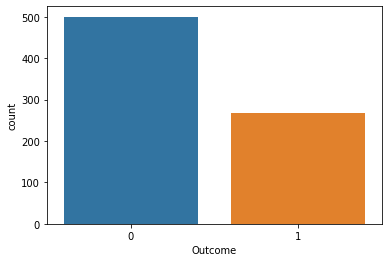

In [73]:
#Visuel sur la variable 'Outcome' (diabétique=1 ; NON diabétiques=0)
sns.countplot(df['Outcome'])

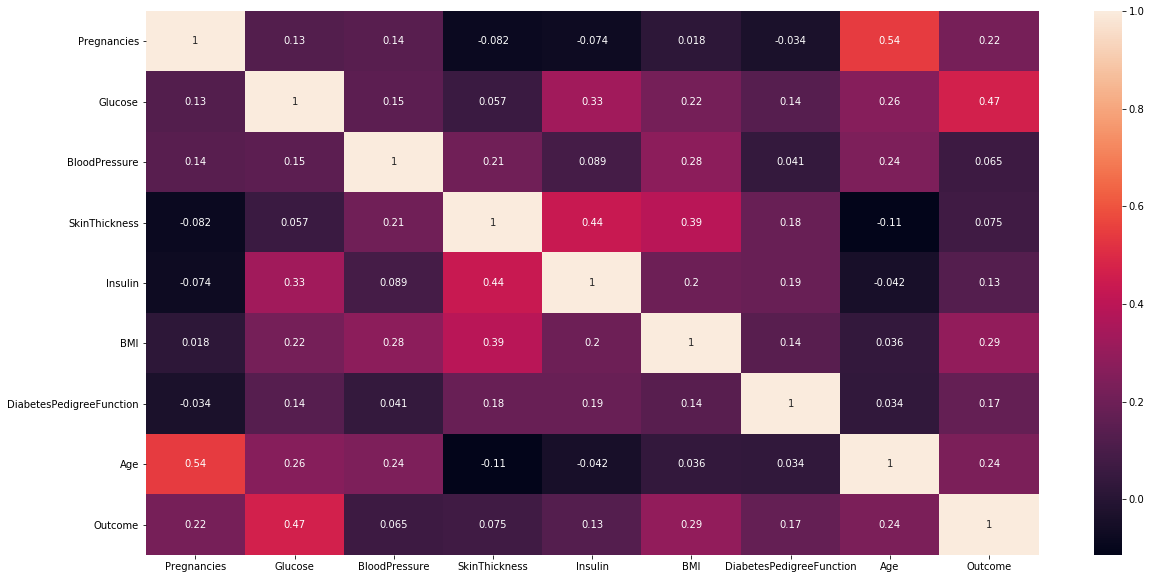

In [74]:
# Création d'une corrélation entre les différents features
plt.figure(figsize=(20,10))
sns.heatmap (df.corr(), annot = True)

In [75]:
#Recherche des valeurs 0 dans les différentes colonnes
count = 0
while (count <= len(df.columns)-2):
    print("Number of {0} in rows " + df.columns[count],
    format(len(df.loc[df.iloc[:,count]== 0]))) 
    count = count + 1
print("Total number of rows: {0}", format(len(df)))   

Number of {0} in rows Pregnancies 111
Number of {0} in rows Glucose 5
Number of {0} in rows BloodPressure 35
Number of {0} in rows SkinThickness 227
Number of {0} in rows Insulin 374
Number of {0} in rows BMI 11
Number of {0} in rows DiabetesPedigreeFunction 0
Number of {0} in rows Age 0
Total number of rows: {0} 768


_____

#### <center>Etude en supprimant les valeurs à 0 et par la médiane</center>

In [76]:
df_clean = df.copy()
df_median = df.copy()
col = ["BMI", "Glucose", "SkinThickness", "Insulin"]
for i in col :
    df_clean = df_clean[df_clean[i] != 0] #non égale 0
    df_median[i]  =  df_median[i].replace(to_replace = 0,  value = df_median[i].median())
df_clean , df_median

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 6              3       78             50             32       88  31.0   
 8              2      197             70             45      543  30.5   
 13             1      189             60             23      846  30.1   
 ..           ...      ...            ...            ...      ...   ...   
 753            0      181             88             44      510  43.3   
 755            1      128             88             39      110  36.5   
 760            2       88             58             26       16  28.4   
 763           10      101             76             48      180  32.9   
 765            5      121             72             23      112  26.2   
 
      DiabetesPedigreeFunction  Age  Outcome  
 3                       0.167   21        0  
 4  

In [77]:
df_clean.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   392.000000  392.000000     392.000000     392.000000  392.000000   
mean      3.301020  122.627551      70.663265      29.145408  156.056122   
std       3.211424   30.860781      12.496092      10.516424  118.841690   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      21.000000   76.750000   
50%       2.000000  119.000000      70.000000      29.000000  125.500000   
75%       5.000000  143.000000      78.000000      37.000000  190.000000   
max      17.000000  198.000000     110.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  392.000000                392.000000  392.000000  392.000000  
mean    33.086224                  0.523046   30.864796    0.331633  
std      7.027659                  0.345488   10.200777    0.471401  
min     18.200000                  0.085000   21.000000    0.000000  
25%     28.400000                  0.269750   23.000000    0.000000  
50%     33.200000                  0.449500   27.000000    0.000000  
75%     37.100000                  0.687000   36.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

______

#### <center>Visualisation sur df_clean</center>

In [78]:
columns = ["Pregnancies",  "Glucose",  "BloodPressure",  "SkinThickness",  "Insulin", "BMI", "DiabetesPedigreeFunction",  "Age"]
def tripleviz(dataframe):
    for col in dataframe[columns]:   


        mu = dataframe[col].mean()
        median = np.median(dataframe[col])
        sigma = dataframe[col].std()
        name = dataframe[col].name

        fig = plt.figure()

        fig.suptitle('Visualisation et analyse de la colonne '+ name , fontsize=14, fontweight='bold')

        ax = fig.add_subplot(133)
        fig.subplots_adjust(top=0.85)
        ax.text(2, 8, 'Les chiffres clés', style='italic',
                bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})


        ax.text(2, 6, r'$\mu=%.2f$' % (mu, ), fontsize=15)
        ax.text(2, 4, r'$\mathrm{median}=%.2f$' % (median, ), fontsize=15)
        ax.text(2, 2, r'$\sigma=%.2f$' % (sigma, ), fontsize=15)

        ax.axis([0, 10, 0, 10])



        plt.subplot(131), sns.distplot(dataframe[col])
        plt.subplot(132), dataframe[col].plot.box(figsize=(16,5))




        plt.show()

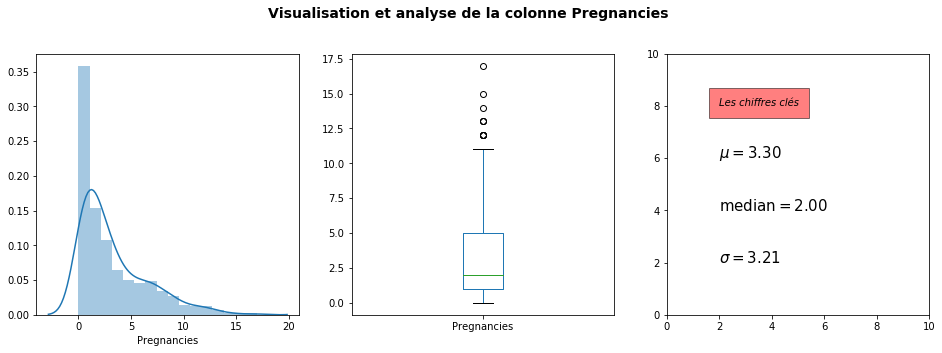

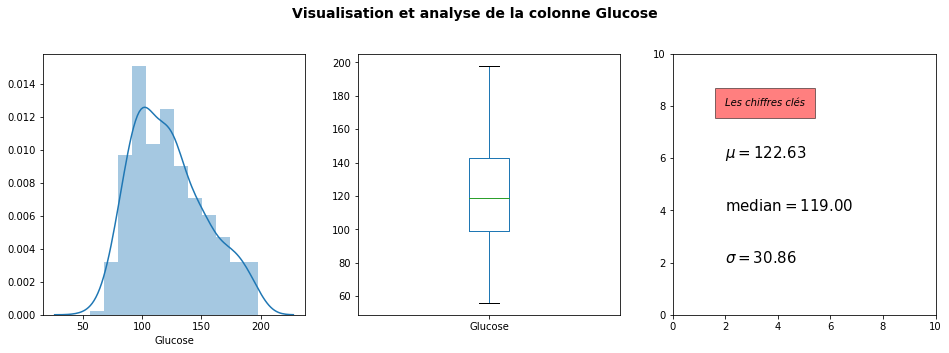

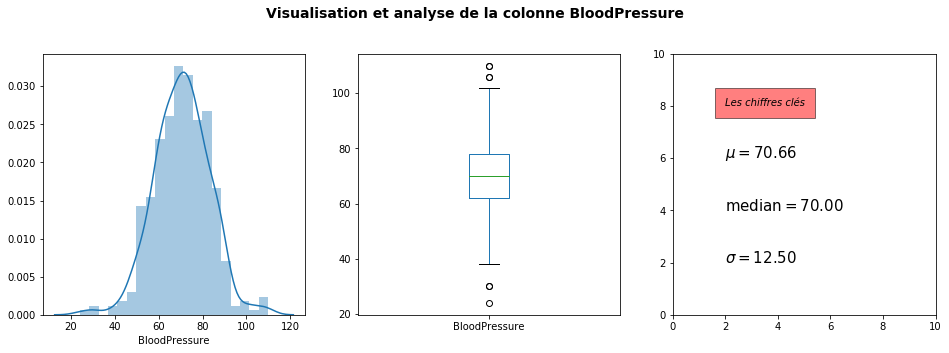

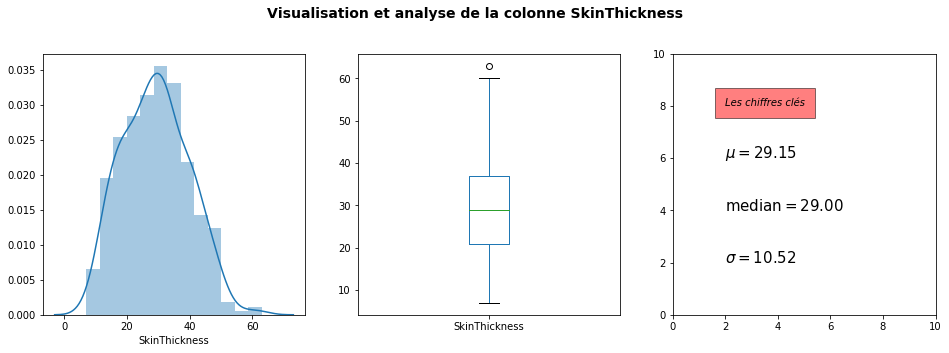

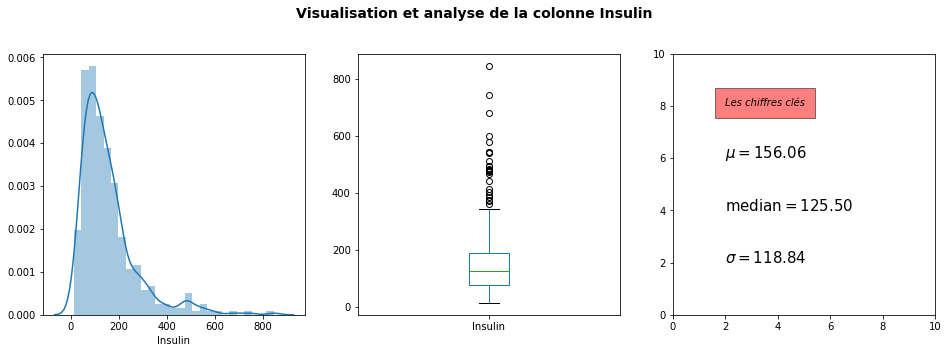

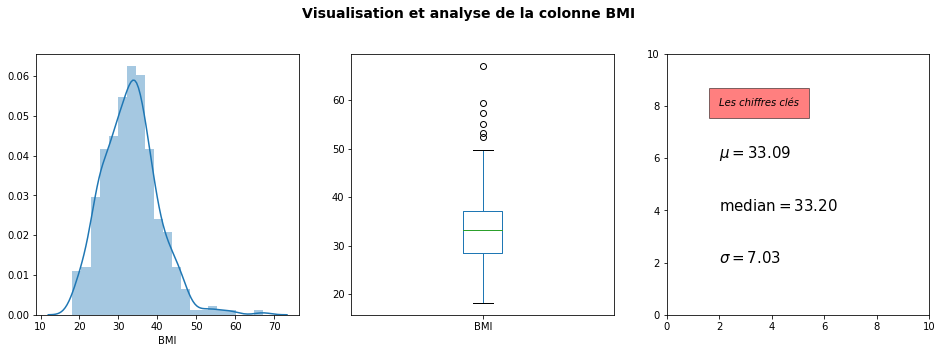

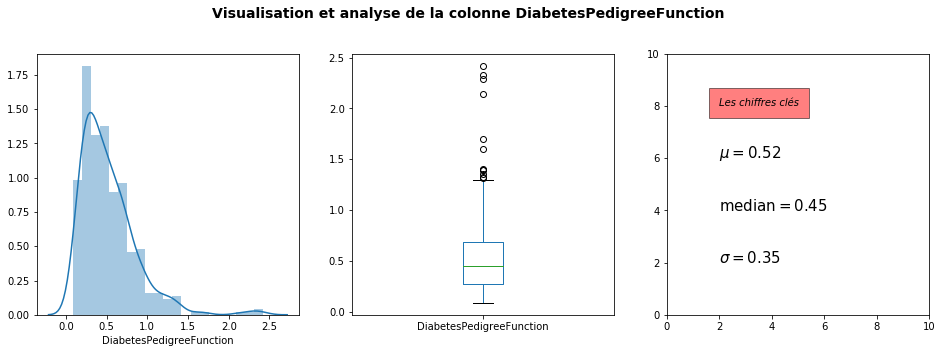

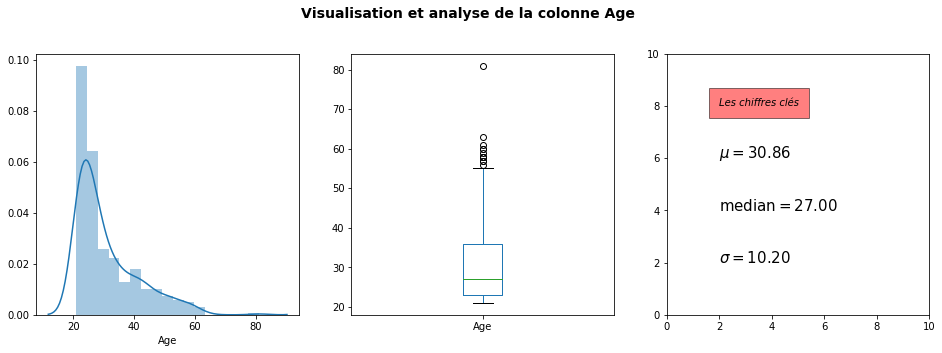

In [79]:
tripleviz(df_clean)

In [80]:
def viz_output(dataframe):


    df_positif = dataframe[dataframe['Outcome']==1]
    df_negatif = dataframe[dataframe['Outcome']==0]

    for col in df_clean :
        plt.figure()
        sns.distplot(df_positif[col], label='positif')
        sns.distplot(df_negatif[col], label='negatif')
        plt.legend()

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


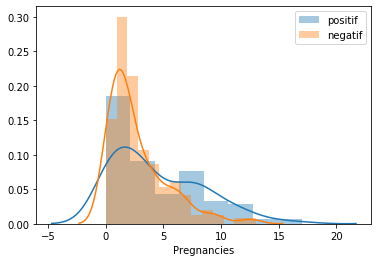

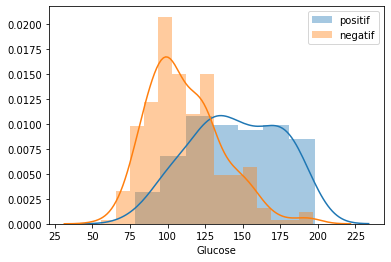

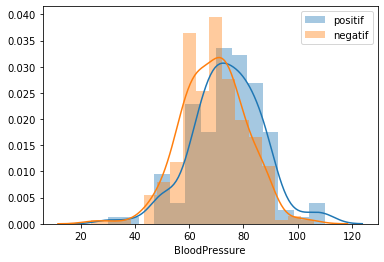

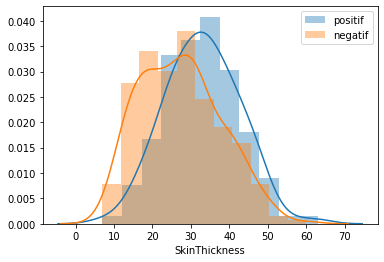

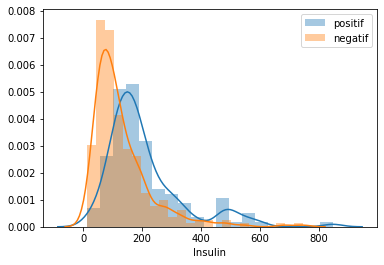

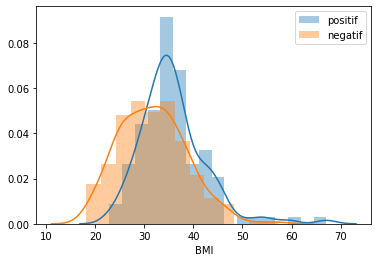

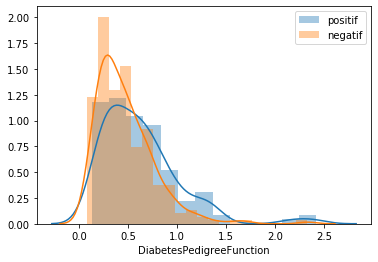

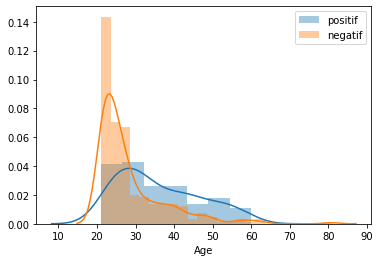

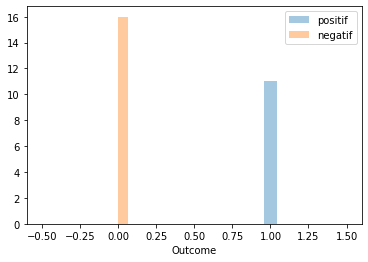

In [81]:
viz_output(df_clean)

(<matplotlib.axes._subplots.AxesSubplot at 0x26d72270448>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26d72270448>)

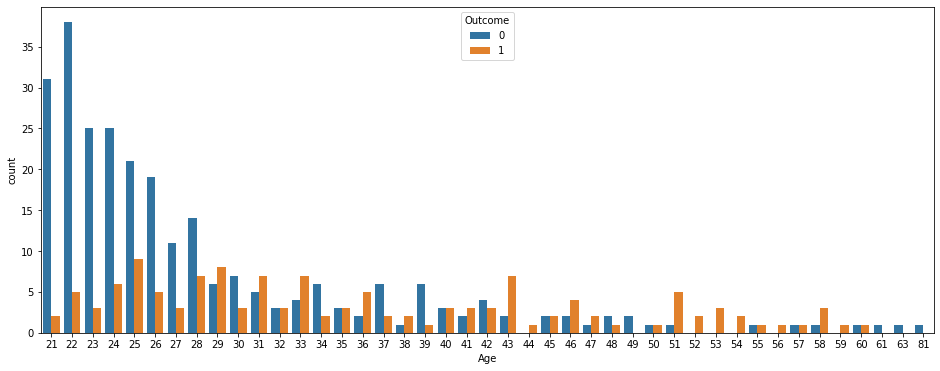

In [82]:
plt.figure(figsize=(16,6))
plt.subplot(), sns.countplot(x= 'Age', hue= 'Outcome', data=df_clean)


________

#### <center>Visualisation sur df_median</center>

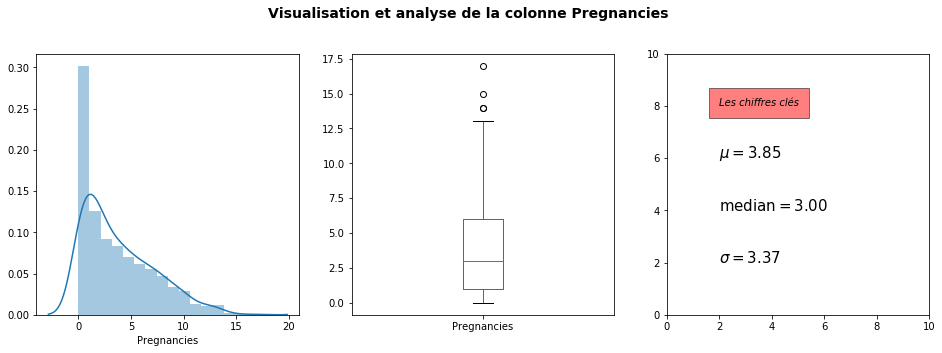

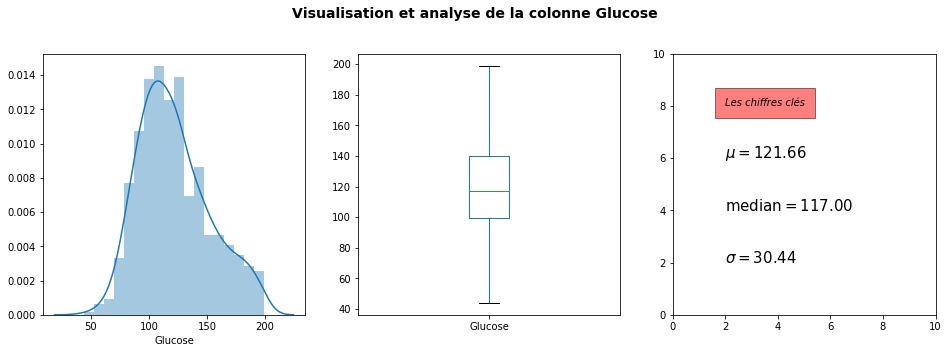

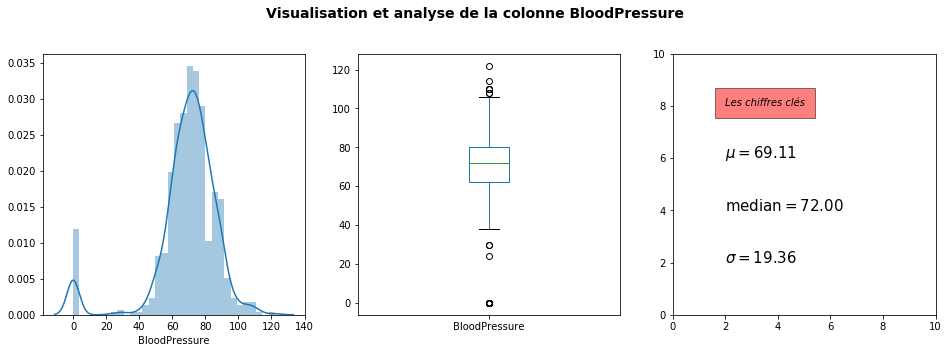

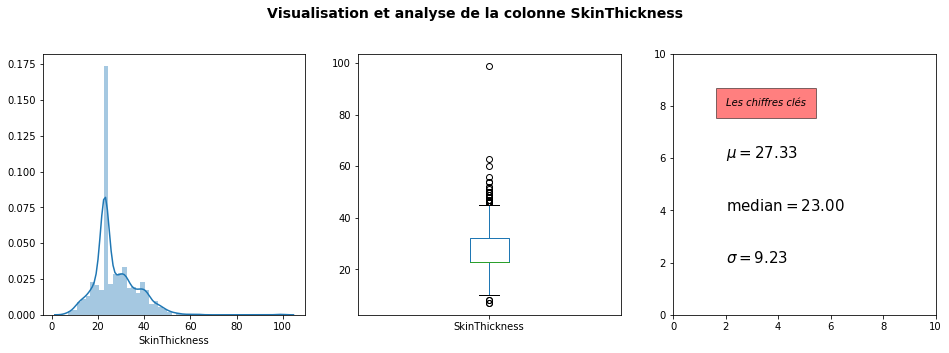

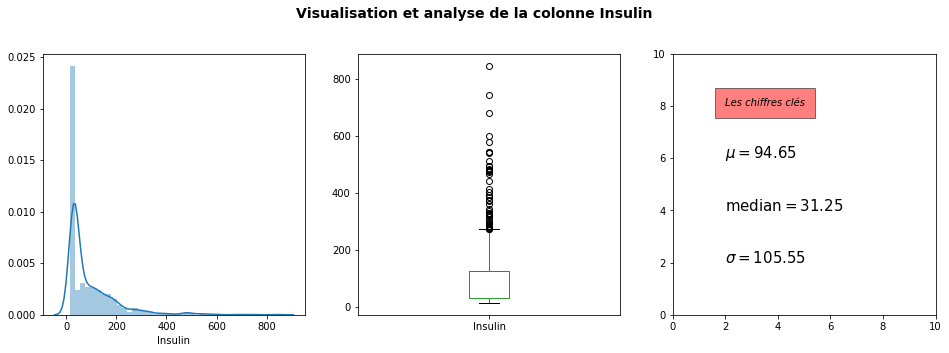

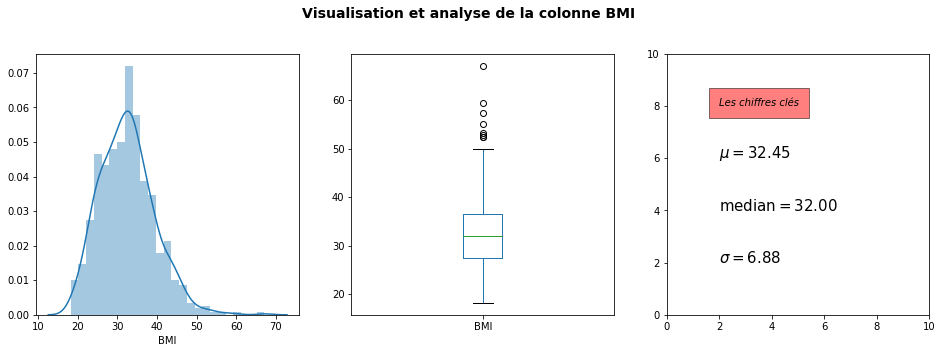

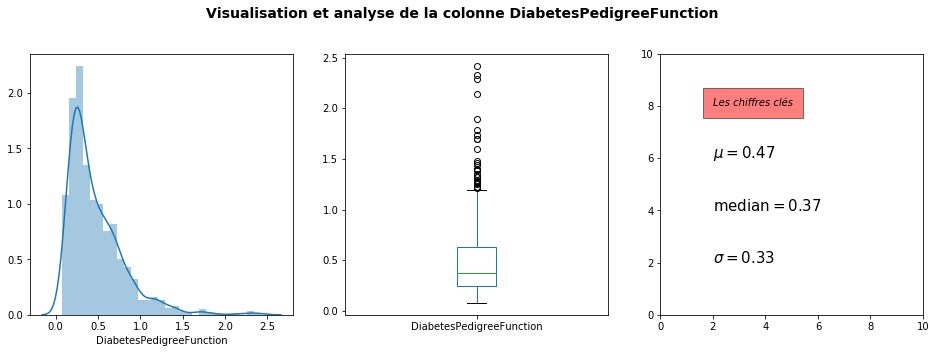

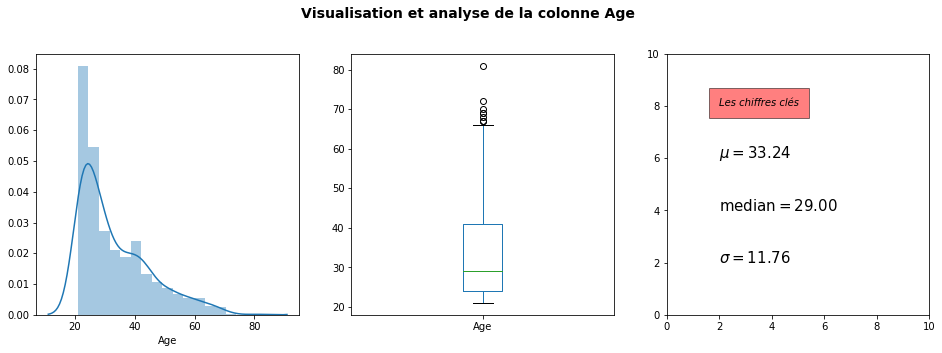

In [83]:
tripleviz(df_median)

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


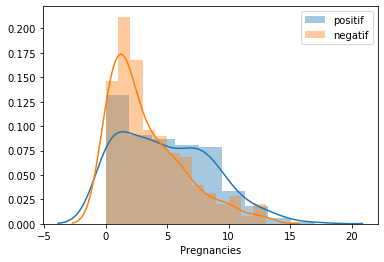

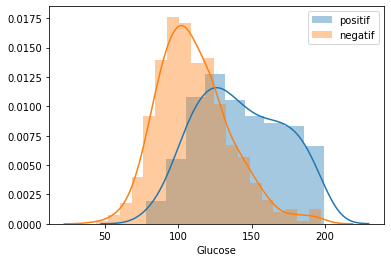

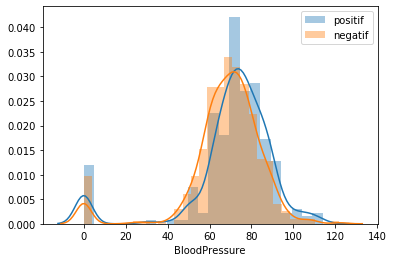

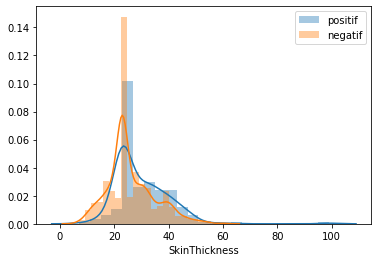

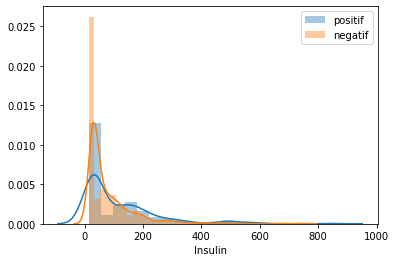

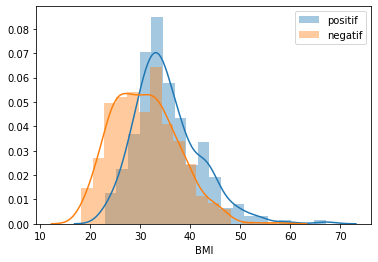

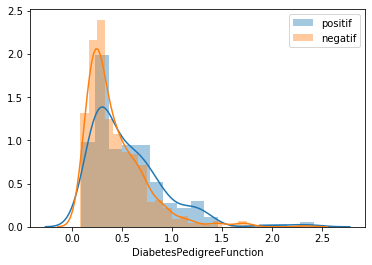

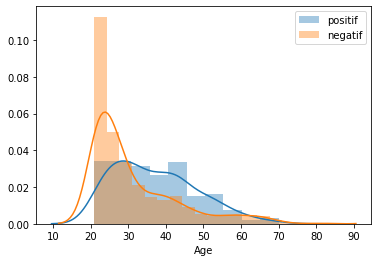

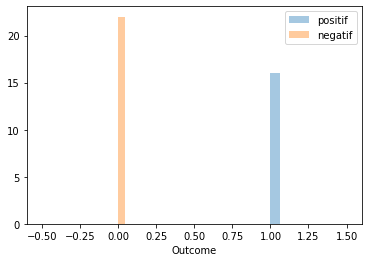

In [84]:
viz_output(df_median)

(<matplotlib.axes._subplots.AxesSubplot at 0x26d714ed348>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26d714ed348>)

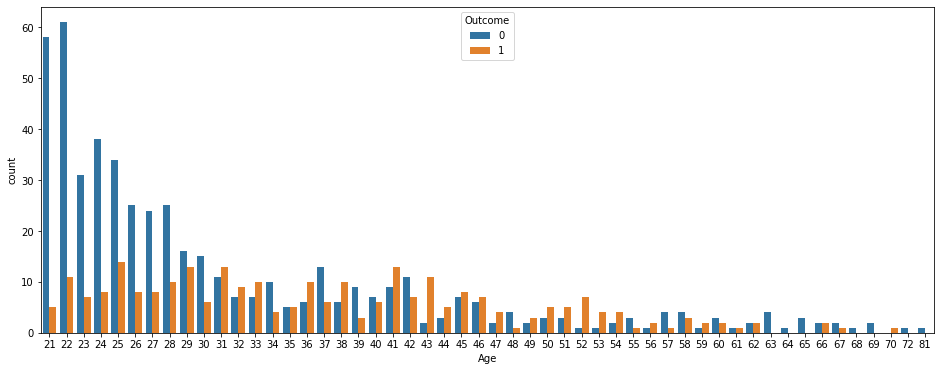

In [85]:
plt.figure(figsize=(16,6))
plt.subplot(), sns.countplot(x= 'Age', hue= 'Outcome', data=df_median)

___________

#### <center>Etude Machine Learning </center>

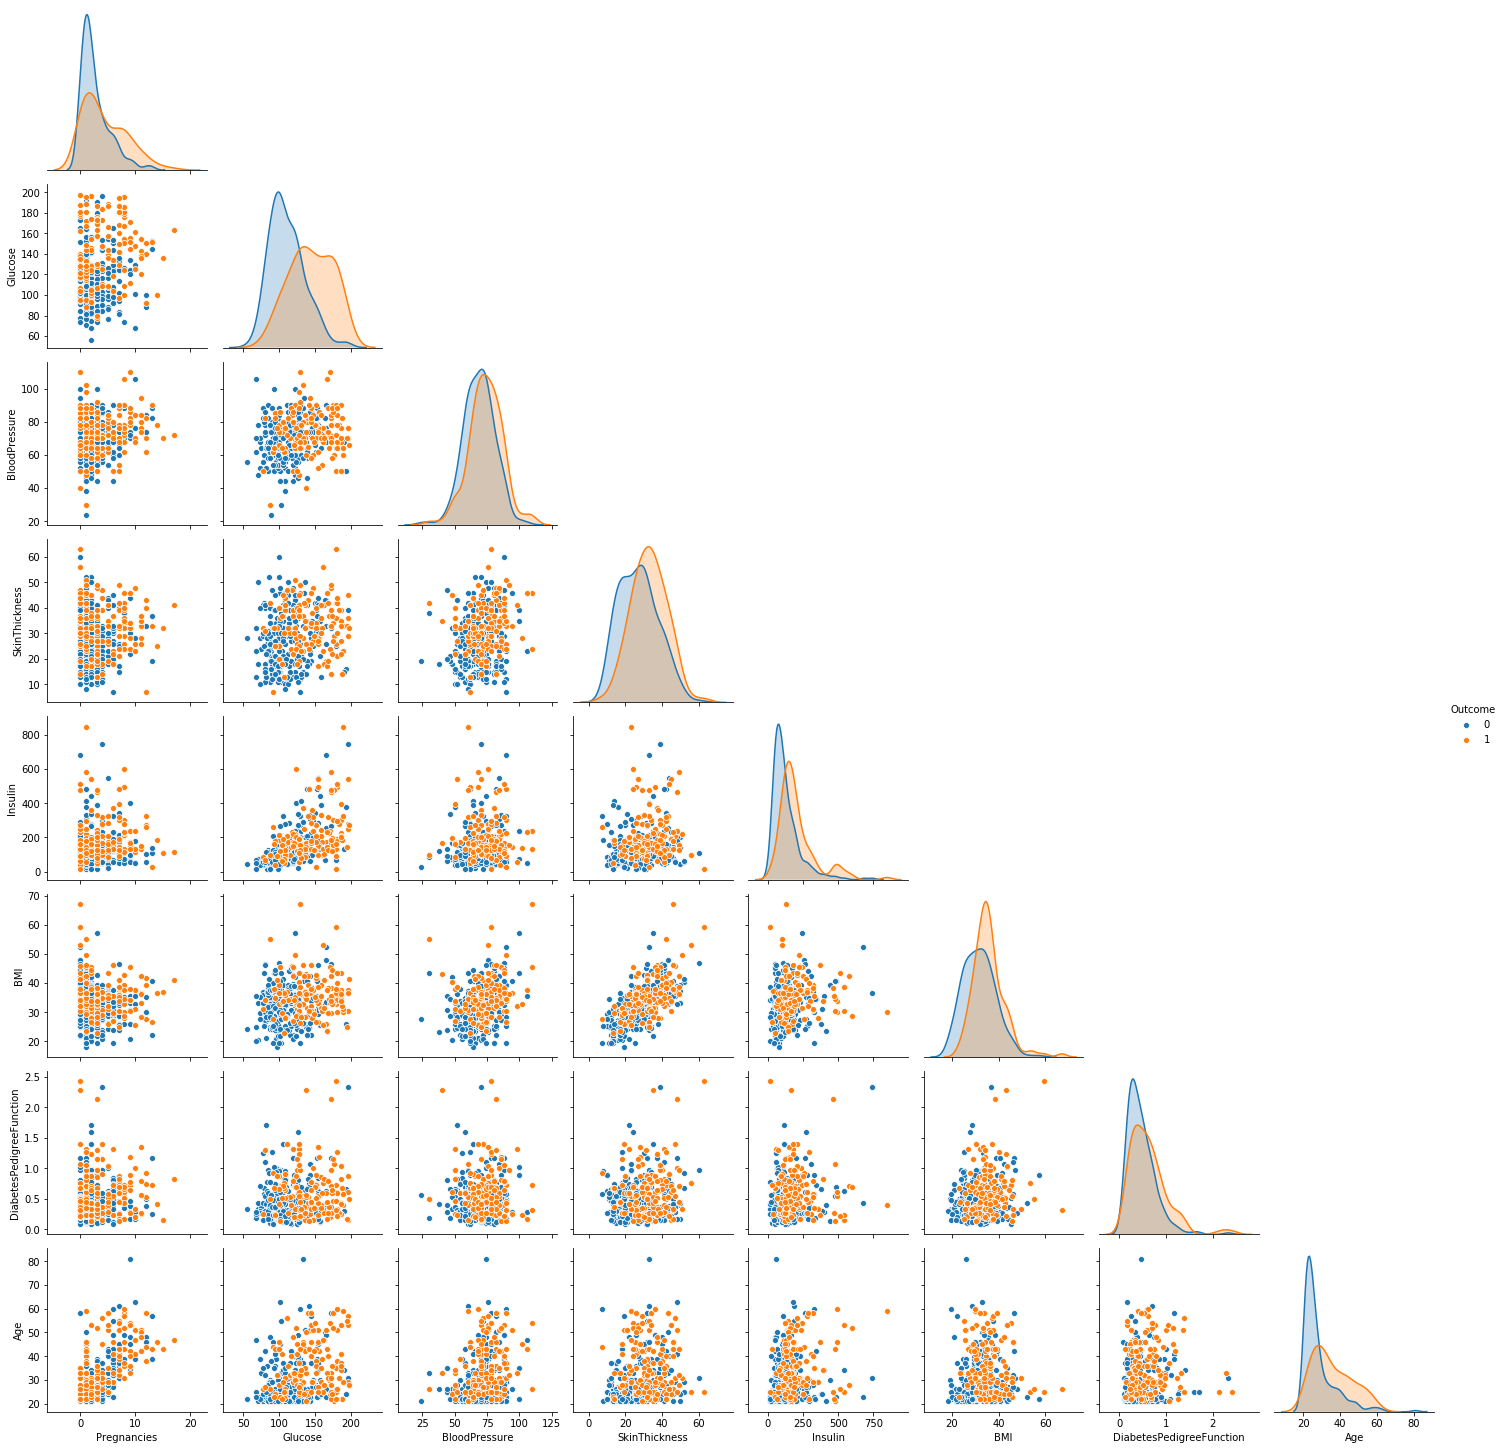

In [86]:
sns.pairplot(df_clean, corner=True, hue='Outcome')

In [87]:
#Importation des différentes librairies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [88]:
#Préparer un tableau avec tous les algorithmesmodels
models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [89]:
def data_target(dataframe):
    X_dataframe = dataframe.iloc[:, 0, -1]
    y = dataframe.iloc[:, -1]

In [90]:
# On renomme la colonne 'Outcome' en 'target'
df_median['target'] = df_median['Outcome']

In [91]:
# On renomme la colonne 'Outcome' en 'target'
df_clean['target'] = df_clean['Outcome']

In [92]:
X = df_median[["BMI", "Glucose", "SkinThickness", "Insulin"]] 
y = df_median["target"]

In [93]:
X1 = df_clean[["BMI", "Glucose", "SkinThickness", "Insulin"]] 
y1 = df_clean["target"]

In [95]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [96]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state = 0)

In [98]:
names = []
scores = []


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   LR  0.784810
1  XGB  0.772152
2   RF  0.810127
3   DT  0.784810


In [99]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(df_median)

In [100]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [101]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [102]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (313, 4)
X_test shape: (79, 4)
Y_train shape: (313,)
Y_test shape: (79,)


In [103]:
# df_median split
X = df_median.drop(columns='target')
y = df_median['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 0)

# df_clean(only engineered features) split
X1 = df_clean.drop(columns='target')
y1 = df_clean['target']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.9, random_state = 0)

# Mix of original and engineered data (pima3) split
#X3 = pima3.drop(columns='test_n')
#y3 = pima3['test_n']
#X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.22, random_state = 0)

a = [X_train, X_train1]
b = [y_train, y_train1]
c = [X_test, X_test1]
d = [y_test, y_test1]

print(X.shape, y.shape)
print(X1.shape, y1.shape)
#print(X3.shape, y3.shape)

(768, 9) (768,)
(392, 9) (392,)


In [104]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [105]:
from termcolor import colored
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Automating model quality prediction
model_names = ['LR', 'XGB', 'RF', 'DT']
models = [LogisticRegression(), XGBClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

# function for model quality prediction
def model_quality(model):
    for i in range(len(a)):
        model.fit(a[i], b[i])
        accuracy_model = round(model.score(c[i], d[i]) *100,2)
        print ("\n\n", '≡'*18, "Model for Pima",i+1, '≡'*18, "\n")
        print('accuracy_model :',accuracy_model, "\n")
        auc = roc_auc_score(d[i], model.predict(c[i]))
        print ("AUC = %2.2f" % auc)
        print (classification_report(d[i], model.predict(c[i])))

    for i in range(len(models)):
        print('■'*22, '\033[1m' + colored(model_names[i], 'green'), '■'*23)
        model_quality(models[i])
        print ("\n\n")

In [106]:
model_quality(LogisticRegression())

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
       

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   s

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0 

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model :

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
       

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    rec

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   s

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model :

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692





C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    re

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
       

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
       

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   s

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
           

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    rec

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96    

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
       

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
           

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
       

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96   

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00   

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score 

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692





C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#




 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
       

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■




C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score  

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692





C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■




C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    re

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
          

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00     

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
        

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 1 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 99.86 

AUC = 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       245

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Model for Pima 2 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

accuracy_model : 87.82 

AUC = 0.84
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       236
           1       0.89      0.72      0.80       117

    accuracy                           0.88       353
   macro avg       0.88      0.84      0.85       353
weighted avg       0.88      0.88      0.87       353

■■■■■■■■■■■■■■■■■■■■■■ LR ■■■■■■■■■■■■■■■■■■■■■■■


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-106-a909fdacfbf6>", line 1, in <module>
    model_quality(LogisticRegression())
  File "<ipython-input-105-723aacb11248>", line 22, in model_quality
    model_quality(models[i])
  File "<ipython-input-105-723aacb11248>", line 22, in model_quality
    model_quality(models[i])
  File "<ipython-input-105-723aacb11248>", line 22, in model_quality
    model_quality(models[i])
  [Previous line repeated 1939 more times]
  File "<ipython-input-105-723aacb11248>", line 12, in model_quality
    model.fit(a[i], b[i])
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\joblib\parallel.py", line

KeyboardInterrupt: 

In [107]:

# Accuracy comparison between different datasets
def accuracy(models, a, b, c, d):
    pi1 = []
    for i in range(len(models)):
        models[i].fit(a,b)
        accs = round(models[i].score(c, d) *100,2)
        pi1.append(accs)
    return pi1

pima_accuracy = {}
for i in range(len(a)):
    pimai_accuracy = accuracy(models, a=a[i], b=b[i], c=c[i], d=d[i])
    pima_accuracy['df'+str(i+1)+'_accuracy'] = pimai_accuracy
    
accuracy_models = pd.DataFrame({
    'Model': model_names, 'df_median_Acc': pima_accuracy['df_median_accuracy'], 'df_clean_Acc': pima_accuracy['df_clean_accuracy']})
accuracy_models['Acc_mean'] = accuracy_models.mean(axis=1).round(2)
accuracy_models.set_index('Model', inplace=True)
accuracy_models.loc['avg'] = accuracy_models.mean()
accuracy_models


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

KeyError: 'df_median_accuracy'

In [ ]:
from sklearn import metrics #accuracy measure
# Classification report comparison between different datasets
def clf_report(model,m,n,p,q):
    model.fit(m, n)
    true_label = q
    pred_label = model.predict(p)
    clf_rep = list(metrics.precision_recall_fscore_support(true_label, pred_label, average='weighted'))[:-1]
    precision.append(clf_rep[0])
    recall.append(clf_rep[1])
    F1_score.append(clf_rep[2])

# PIMA
precision = []
recall = []
F1_score = []
for i in range(len(models)):
    clf_report(models[i],X_train, y_train, X_test, y_test)
    
dict_1 = {'Model':model_names, 'F1_score': F1_score, 'Precision': precision, 'Recall': recall}           
df_pima1 = pd.DataFrame(dict_1, columns=['Model', 'Precision', 'Recall', 'F1_score'])
df_pima1.set_index('Model', inplace=True)
df_pima1.loc['avg'] = df_pima1.mean()
print('▬'*20, '\033[1m' + colored('Pima_1', 'green'), '▬'*20)
print(df_pima1[['Precision', 'Recall', 'F1_score']], "\n\n")


# PIMA_1
precision = []
recall = []
F1_score = []
for i in range(len(models)):
    clf_report(models[i],X_train1, y_train1, X_test1, y_test1)
    
dict_2 =  {'Model':model_names, 'F1_score': F1_score, 'Precision': precision, 'Recall': recall}           
df_pima2 = pd.DataFrame(dict_2, columns=['Model', 'Precision', 'Recall', 'F1_score'])
df_pima2.set_index('Model', inplace=True)
df_pima2.loc['avg'] = df_pima2.mean()
print('▬'*20, '\033[1m' + colored('Pima_2', 'green'), '▬'*20)
print(df_pima2[['Precision', 'Recall', 'F1_score']], "\n\n")


# PIMA_3
#precision = []
#recall = []
#F1_score = []
#for i in range(len(models)):
 #   clf_report(models[i],X_train3, y_train3, X_test3, y_test3)
    
#dict_3 =  {'Model':model_names, 'F1_score': F1_score, 'Precision': precision, 'Recall': recall}             
#df_pima3 = pd.DataFrame(dict_3, columns=['Model', 'Precision', 'Recall', 'F1_score'])
#df_pima3.set_index('Model', inplace=True)
#df_pima3.loc['avg'] = df_pima3.mean()
#print('▬'*20, '\033[1m' + colored('Pima_3', 'green'), '▬'*20)
#print(df_pima3[['Precision', 'Recall', 'F1_score']])


In [108]:
Validation croisée K-Fold avec Scikit Learn :

Cette méthode divise l'ensemble de données en K partitions égales ("plis"), puis utilise 1 pli comme ensemble de test et l'union des autres plis comme ensemble d'entraînement. 
Ensuite, la précision du modèle est testée. Le processus suit les étapes ci-dessus K fois, en utilisant chaque fois des plis différents comme jeu de test. 
La précision moyenne du processus est la précision du test.

    Avantages : estimation plus précise de la précision hors échantillon. Utilisation plus "efficace" des données (chaque observation est utilisée à la fois pour la formation et le test)

    Inconvénients : Beaucoup plus lent que la division Train/Test.

Nous allons avancer avec la validation croisée K-Fold car elle est plus précise et utilise les données efficacement. Nous formerons les modèles en utilisant la validation croisée 10 fois et calculerons la précision moyenne des modèles. "cross_val_score" fournit sa propre interface de formation et de calcul de la précision.

SyntaxError: invalid syntax (<ipython-input-108-c29586ecc737>, line 1)

In [109]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


TypeError: cannot unpack non-iterable LogisticRegression object

In [110]:
Nous pouvons tracer les scores de précision à l'aide de Seaborn

SyntaxError: invalid syntax (<ipython-input-110-83ae05dd144a>, line 1)

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [ ]:
Nous pouvons voir que la régression logistique, la forêt aléatoire et le XGBoost ont obtenu de meilleurs résultats. Depuis le niveau de base, nous pouvons observer que la régression logistique fonctionne mieux que les autres algorithmes.

In [ ]:
# Un estimateur d'apprentissage supervisé avec une fit méthode qui fournit des informations 
# sur l'importance des caractéristiques soit par un coef_ attribut, soit par un feature_importances_attribut.
from sklearn.feature_selection import RFECV
logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X_train, y_train)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
fig ,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=df_median,x='BMI',hue='Outcome',palette='gist_rainbow',ax=ax1)
sns.countplot(data=df_median,x='Glucose',hue='Outcome',palette='viridis',ax=ax2)
sns.countplot(data=df_median,x='SkinThickness',hue='Outcome',palette='viridis',ax=ax3)
sns.countplot(data=df_median,x='Insulin',hue='Outcome',palette='gist_rainbow',ax=ax4)